In [84]:
import pandas as pd
import seaborn as sns

In [85]:
df= pd.read_csv('crop-prediction.csv')
df

,N,P,K,ph,Rainfall,Temperature,Humidity,Crop
0,90,42,43,6.502985,202.935536,20.879744,82.002744,Rice
1,85,58,41,7.038096,226.655537,21.770462,80.319644,Rice
2,60,55,44,7.840207,263.964248,23.004459,82.320763,Rice
3,74,35,40,6.980401,242.864034,26.491096,80.158363,Rice
4,78,42,42,7.628473,262.717340,20.130175,81.604873,Rice
...,...,...,...,...,...,...,...,...
4395,107,34,32,6.780064,177.774507,26.774637,66.413269,cotton
4396,99,15,27,6.086922,127.924610,27.417112,56.636362,cotton
4397,118,33,30,6.362608,173.322839,24.131797,67.225123,cotton
4398,117,32,34,6.758793,127.175293,26.272418,52.127394,cotton


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4400 entries, 0 to 4399
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            4400 non-null   int64  
 1   P            4400 non-null   int64  
 2   K            4400 non-null   int64  
 3   ph           4400 non-null   float64
 4   Rainfall     4400 non-null   float64
 5   Temperature  4400 non-null   float64
 6   Humidity     4400 non-null   float64
 7   Crop         4400 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 275.1+ KB


In [87]:
df.duplicated().sum()

0

In [88]:
df.describe()

,N,P,K,ph,Rainfall,Temperature,Humidity
count,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000
mean,50.551818,53.362727,48.149091,6.469480,103.463655,25.616244,71.481779
std,36.913137,32.982133,50.642173,0.773850,54.952141,5.063173,22.261281
min,0.000000,5.000000,5.000000,3.504752,20.211267,8.825675,14.258040
25%,21.000000,28.000000,20.000000,5.971693,64.551686,22.769375,60.261953
50%,37.000000,51.000000,32.000000,6.425045,94.867624,25.598693,80.473146
75%,84.250000,68.000000,49.000000,6.923643,124.267508,28.561654,89.948771
max,140.000000,145.000000,205.000000,9.935091,298.560117,43.675493,99.981876


In [89]:
df.corr(numeric_only=True)

,N,P,K,ph,Rainfall,Temperature,Humidity
N,1.000000,-0.231460,-0.140512,0.096683,0.059020,0.026504,0.190688
P,-0.231460,1.000000,0.736232,-0.138019,-0.063839,-0.127541,-0.118734
K,-0.140512,0.736232,1.000000,-0.169503,-0.053461,-0.160387,0.190859
ph,0.096683,-0.138019,-0.169503,1.000000,-0.109069,-0.017795,-0.008483
Rainfall,0.059020,-0.063839,-0.053461,-0.109069,1.000000,-0.030084,0.094423
Temperature,0.026504,-0.127541,-0.160387,-0.017795,-0.030084,1.000000,0.205320
Humidity,0.190688,-0.118734,0.190859,-0.008483,0.094423,0.205320,1.000000


<Axes: >

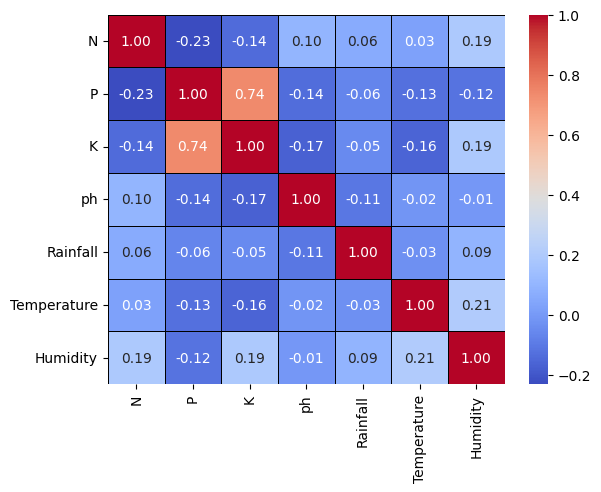

In [90]:
import seaborn as sns
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor='black')

In [91]:
df.Crop.value_counts()

Crop
cotton         300
sugarcane      300
wheat          300
maize          300
rice           200
Jute           100
Coffee         100
pulses         100
millets        100
mungbean       100
Coconut        100
blackgram      100
lentil         100
banana         100
mango          100
grapes         100
Cotton         100
Rice           100
Maize          100
Lentil         100
ChickPea       100
KidneyBeans    100
PigeonPeas     100
MothBeans      100
MungBean       100
Blackgram      100
Pomegranate    100
Orange         100
Banana         100
Mango          100
Grapes         100
Watermelon     100
Muskmelon      100
Apple          100
Papaya         100
Name: count, dtype: int64

In [92]:
df['Crop'].unique().size

35

In [93]:
import matplotlib.pyplot as plt

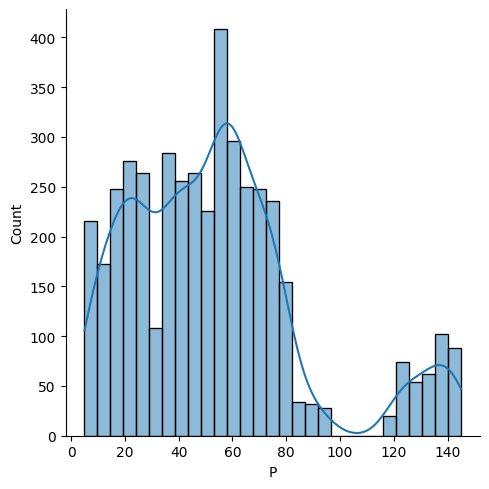

In [94]:
sns.displot(df['P'], kde=True)
plt.show()

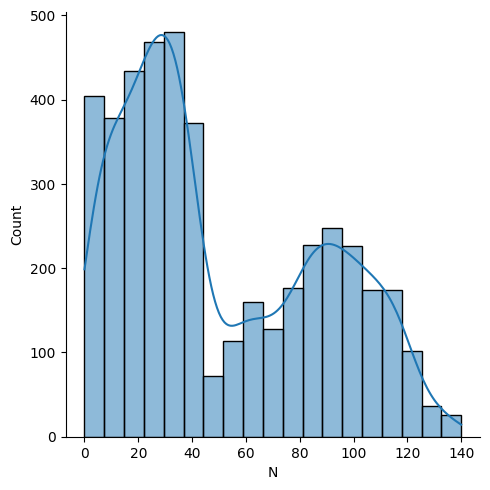

In [95]:
sns.displot(df['N'], kde=True)
plt.show()

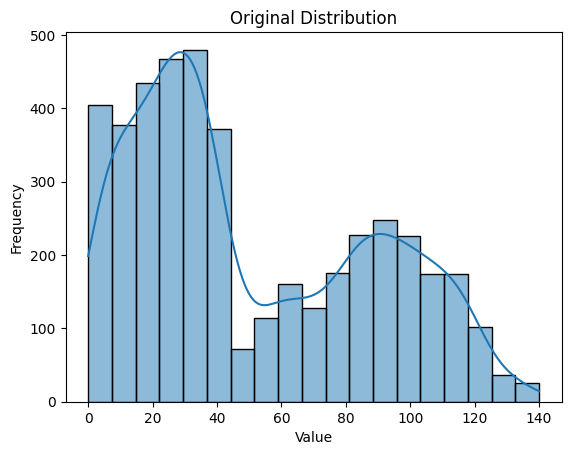

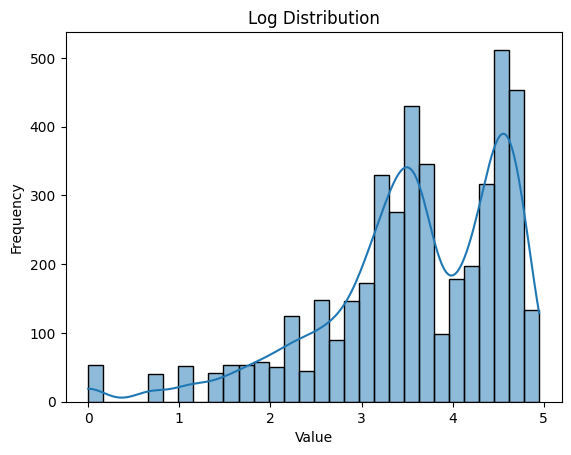

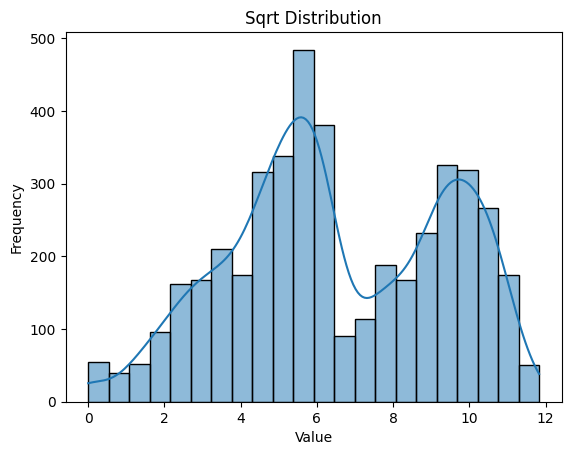

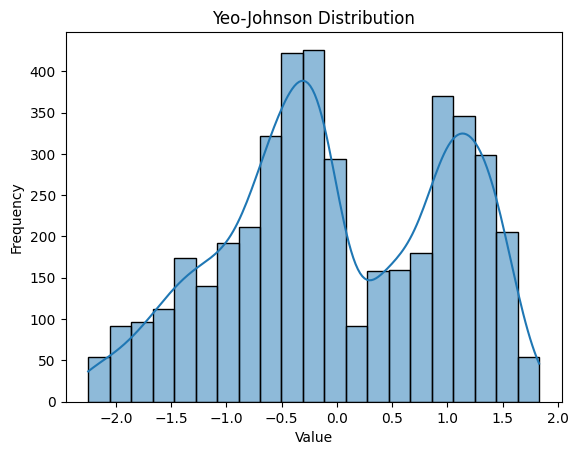

Skewness:
N: 0.5095
N_log: -1.0596
N_sqrt: -0.0723
N_yeojohn: -0.1297

Shapiro-Wilk Test:
N: stat=0.9154, p-value=0.0000 ❌ Not normal
N_log: stat=0.9143, p-value=0.0000 ❌ Not normal
N_sqrt: stat=0.9650, p-value=0.0000 ❌ Not normal
N_yeojohn: stat=0.9635, p-value=0.0000 ❌ Not normal


In [96]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
from scipy.stats import shapiro

# Log Transform (only if values > 0)
df['N_log'] = np.log(df['N'] + 1)  # +1 to avoid log(0)

# Sqrt Transform
df['N_sqrt'] = np.sqrt(df['N'])

# Yeo-Johnson Transform (works for any values)
pt = PowerTransformer(method='yeo-johnson')
df['N_yeojohn'] = pt.fit_transform(df[['N']])

# ==== Plotting All ====
transforms = ['N', 'N_log', 'N_sqrt', 'N_yeojohn']
titles = ['Original', 'Log', 'Sqrt', 'Yeo-Johnson']

for col, title in zip(transforms, titles):
    sns.histplot(df[col], kde=True)
    plt.title(f'{title} Distribution')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

# ==== Skewness ====
print("Skewness:")
for col in transforms:
    print(f"{col}: {df[col].skew():.4f}")

# ==== Shapiro-Wilk Normality Test ====
print("\nShapiro-Wilk Test:")
for col in transforms:
    stat, p = shapiro(df[col])
    print(f"{col}: stat={stat:.4f}, p-value={p:.4f} {'✅ Normal' if p > 0.05 else '❌ Not normal'}")



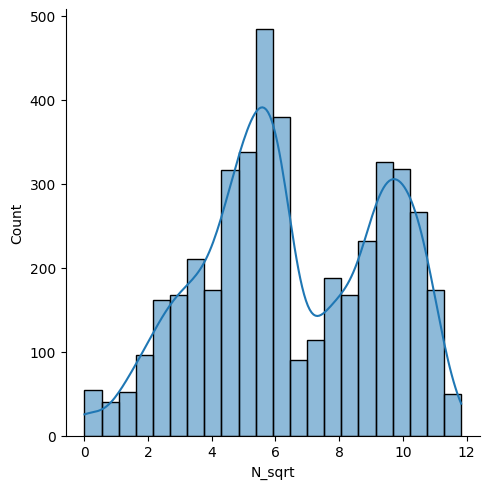

In [97]:
sns.displot(df['N_sqrt'], kde=True)
plt.show()


In [98]:
df.Crop.unique()

array(['Rice', 'Maize', 'ChickPea', 'KidneyBeans', 'PigeonPeas',
       'MothBeans', 'MungBean', 'Blackgram', 'Lentil', 'Pomegranate',
       'Banana', 'Mango', 'Grapes', 'Watermelon', 'Muskmelon', 'Apple',
       'Orange', 'Papaya', 'Coconut', 'Cotton', 'Jute', 'Coffee', 'rice',
       'maize', 'pulses', 'millets', 'sugarcane', 'mungbean', 'blackgram',
       'lentil', 'wheat', 'banana', 'mango', 'grapes', 'cotton'],
      dtype=object)

In [106]:
df.head()

,N,P,K,ph,Rainfall,Temperature,Humidity,Crop,N_log,N_sqrt,N_yeojohn,crop_encoded
0,90,42,43,6.502985,202.935536,20.879744,82.002744,rice,4.510860,9.486833,1.051047,1
1,85,58,41,7.038096,226.655537,21.770462,80.319644,rice,4.454347,9.219544,0.960517,1
2,60,55,44,7.840207,263.964248,23.004459,82.320763,rice,4.110874,7.745967,0.453737,1
3,74,35,40,6.980401,242.864034,26.491096,80.158363,rice,4.317488,8.602325,0.749884,1
4,78,42,42,7.628473,262.717340,20.130175,81.604873,rice,4.369448,8.831761,0.828446,1


In [108]:
df.crop_encoded.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26], dtype=int64)

In [109]:
df.crop_encoded.value_counts()

crop_encoded
2     400
20    400
1     300
25    300
26    300
8     200
9     200
11    200
12    200
13    200
7     200
6     100
4     100
3     100
24    100
23    100
22    100
21    100
16    100
19    100
18    100
17    100
15    100
5     100
10    100
14    100
Name: count, dtype: int64

In [110]:
X = df.drop(['crop_encoded', 'Crop', 'N_log', 'N_yeojohn', 'N_sqrt'], axis=1)
y = df['crop_encoded']


In [114]:
y.sample(5)

1915    20
1501    16
2171    22
748      8
3602     2
Name: crop_encoded, dtype: int64

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [129]:

X_train.shape

(3520, 7)

In [130]:

from sklearn.preprocessing import MinMaxScaler
mx = MinMaxScaler()
X_train = mx.fit_transform(X_train)
X_test = mx.transform(X_test)

In [131]:
X_train


array([[0.52857143, 0.36428571, 0.085     , ..., 0.21830327, 0.27139159,
        0.61128258],
       [0.38571429, 0.44285714, 0.235     , ..., 0.43516203, 0.77047743,
        0.92212835],
       [0.27857143, 1.        , 0.98      , ..., 0.18692745, 0.80073851,
        0.77377871],
       ...,
       [0.05      , 0.48571429, 0.1       , ..., 0.08980509, 0.53647858,
        0.57013446],
       [0.07142857, 0.93571429, 0.995     , ..., 0.30768644, 0.35503333,
        0.90870772],
       [0.22857143, 0.52142857, 0.085     , ..., 0.11926686, 0.43458302,
        0.5610754 ]])

In [132]:
from sklearn.preprocessing import MinMaxScaler
mx = MinMaxScaler()
X_train = mx.fit_transform(X_train)


In [133]:
X_train

array([[0.52857143, 0.36428571, 0.085     , ..., 0.21830327, 0.27139159,
        0.61128258],
       [0.38571429, 0.44285714, 0.235     , ..., 0.43516203, 0.77047743,
        0.92212835],
       [0.27857143, 1.        , 0.98      , ..., 0.18692745, 0.80073851,
        0.77377871],
       ...,
       [0.05      , 0.48571429, 0.1       , ..., 0.08980509, 0.53647858,
        0.57013446],
       [0.07142857, 0.93571429, 0.995     , ..., 0.30768644, 0.35503333,
        0.90870772],
       [0.22857143, 0.52142857, 0.085     , ..., 0.11926686, 0.43458302,
        0.5610754 ]])

In [134]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test=sc.transform(X_test)

In [135]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [136]:
models = {
    'LogisticRegression': LogisticRegression(),
    'GaussianNB':GaussianNB(),
    'SVC':SVC(),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'ExtraTreeClassifier':ExtraTreeClassifier(),
    'RandomForestClassifier':RandomForestClassifier(),
    'BaggingClassifier':BaggingClassifier(),
    'GradientBoostingClassifier':GradientBoostingClassifier(),
    'AdaBoostClassifier':AdaBoostClassifier()
}

In [137]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print(f"{name} model with accuracy: {score}")

LogisticRegression model with accuracy: 0.6420454545454546
GaussianNB model with accuracy: 0.6681818181818182
SVC model with accuracy: 0.6568181818181819
KNeighborsClassifier model with accuracy: 0.5306818181818181
DecisionTreeClassifier model with accuracy: 0.4954545454545455
ExtraTreeClassifier model with accuracy: 0.49318181818181817
RandomForestClassifier model with accuracy: 0.5022727272727273
BaggingClassifier model with accuracy: 0.49886363636363634
GradientBoostingClassifier model with accuracy: 0.5


c:\Users\Akash\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier model with accuracy: 0.1431818181818182


In [138]:
gnb= GaussianNB()
gnb.fit(X_train, y_train)   
y_pred = gnb.predict(X_test)
accuracy_score(y_test, y_pred)

0.6681818181818182

In [139]:
df.head()

,N,P,K,ph,Rainfall,Temperature,Humidity,Crop,N_log,N_sqrt,N_yeojohn,crop_encoded
0,90,42,43,6.502985,202.935536,20.879744,82.002744,rice,4.510860,9.486833,1.051047,1
1,85,58,41,7.038096,226.655537,21.770462,80.319644,rice,4.454347,9.219544,0.960517,1
2,60,55,44,7.840207,263.964248,23.004459,82.320763,rice,4.110874,7.745967,0.453737,1
3,74,35,40,6.980401,242.864034,26.491096,80.158363,rice,4.317488,8.602325,0.749884,1
4,78,42,42,7.628473,262.717340,20.130175,81.604873,rice,4.369448,8.831761,0.828446,1


In [141]:
def recommendation(N,P,K,temperature,humidity,ph,rainfall):
    features = np.array([[N,P,K,temperature,humidity,ph,rainfall]])
    mx_features = mx.fit_transform(features)
    sc_mx_features = sc.fit_transform(mx_features)
    prediction = gnb.predict(sc_mx_features)
    return df.Crop.unique()[prediction[0]]

In [142]:
N=90
P= 42
K= 43
temperature= 20.879744
humidity=82.002744
ph=6.502985
rainfall=202.935536

predict = recommendation(N,P,K,temperature,humidity,ph,rainfall)

In [143]:
predict

'wheat'